<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/PM10_PROJECT_Kocaeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Time Series Analysis of PM10 in Kocaeli
A.Özge Akar,
Assoc. Prof. Dr. Yıldırım Akbal,
TED Univerity 2022-2023

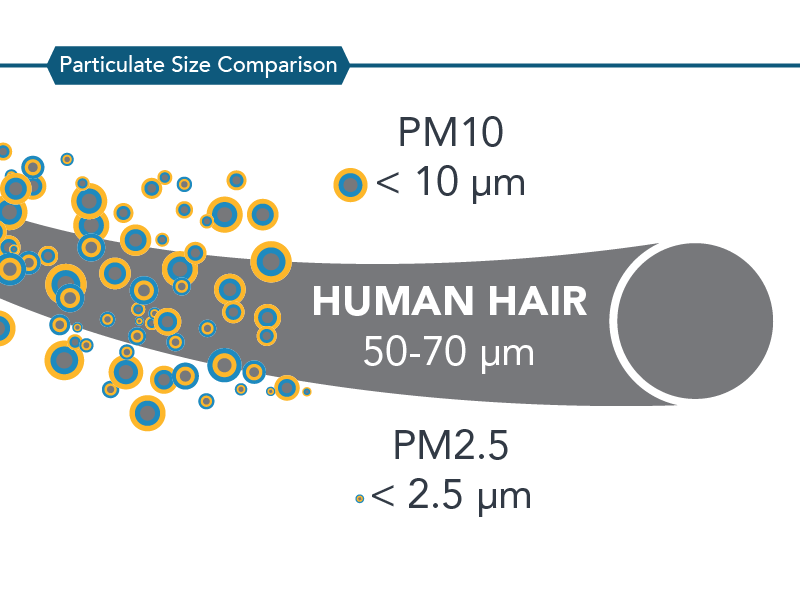

image ref: www2.arb.ca.gov/resources/inhalable-particulate-matter-and-health

# Libraries

---

In [21]:
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor

# Data Loading

---

In [2]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of Copyy kocaeli_PM10.xlsx")

In [3]:
data

,Tarih,Kocaeli
0,NaT,PM10 ( µg/m3 )
1,2015-09-26 11:00:00,-
2,2015-09-26 12:00:00,"55,49"
3,2015-09-26 13:00:00,"35,87"
4,2015-09-26 14:00:00,"31,00"
...,...,...
62085,2022-10-26 07:00:00,"39,37"
62086,2022-10-26 08:00:00,"50,88"
62087,2022-10-26 09:00:00,"48,00"
62088,2022-10-26 10:00:00,"79,47"


In [4]:
data.head = ["time", "pm"]
data = data.iloc[2:,1]
data.index = range(len(data))

In [5]:
data

0        55,49
1        35,87
2        31,00
3        30,95
4        29,00
         ...  
62083    39,37
62084    50,88
62085    48,00
62086    79,47
62087    94,00
Name: Kocaeli, Length: 62088, dtype: object

In [6]:
data.isnull().sum()

0

In [7]:
for i in range(len(data)):
    data[i] = data[i].replace(",",".")
    data[i] = data[i].replace("-", "")
    #to make right calculations

In [8]:
data = pd.to_numeric(data)
data = data.interpolate()

# Reality Check

---

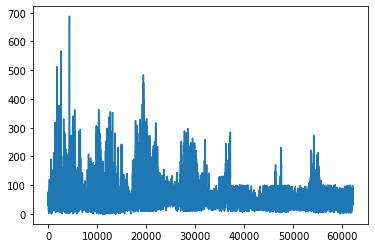

In [9]:
plt.plot(data)

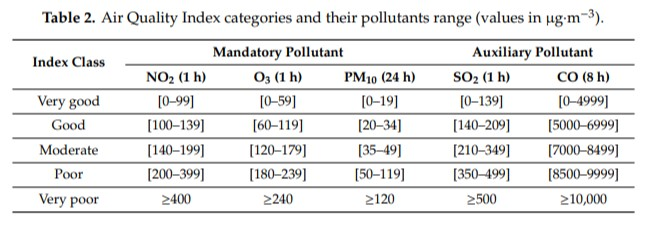


Ref: Long-Term Assessment of Air Quality and Identification of Aerosol Sources at Setúbal, Portugal July 2020International Journal of Environmental Research and Public Health 17(15):5447 DOI:10.3390/ijerph17155447 LicenseCC BY 4.0 Projects: Special Issue of IJERPH dedicated to "Integrated human exposure to air pollution"PM Fugitive

In [10]:
# Probably our data value cannot be bigger than 350 in reference to above table
data[data > 350] = 350

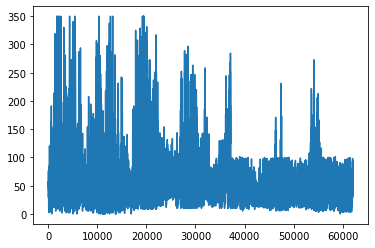

In [11]:
plt.plot(data)

#Root

---


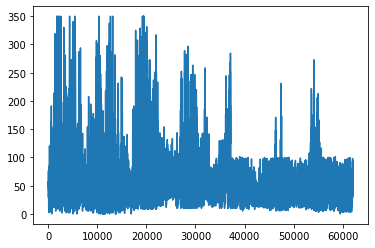

In [76]:
plt.plot(data)   #### you see there is not explicit trend, nor unit root.

In [77]:
adfuller(data) ### it has no unit root

(-21.49332965200821,
 0.0,
 55,
 62032,
 {'1%': -3.4304554225339, '5%': -2.861586594794066, '10%': -2.566794800833168},
 523634.815398423)

#Acf Pacf

---

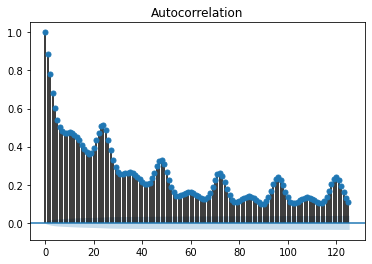

In [78]:
plot_acf(data, lags = 125);

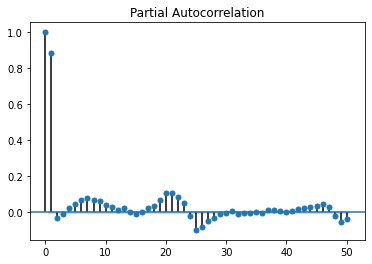

In [79]:
plot_pacf(data, lags = 50);

# ARIMA

---

In [17]:
model = ARIMA(data, order=(2,0,0)) # (p, d, q)
model_fit = model.fit(disp=0)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Kocaeli   No. Observations:                62088
Model:                     ARMA(2, 0)   Log Likelihood             -265031.057
Method:                       css-mle   S.D. of innovations             17.282
Date:                Sat, 14 Jan 2023   AIC                         530070.114
Time:                        07:47:36   BIC                         530106.259
Sample:                             0   HQIC                        530081.324
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.5542      0.593     88.629      0.000      51.392      53.716
ar.L1.Kocaeli     0.9174      0.004    228.718      0.000       0.910       0.925
ar.L2.Kocaeli    -0.0343      0.004     -8.556      0.000      -0.042      -0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1386           +0.0000j            1.1386            0.0000
AR.2           25.5925           +0.0000j           25.5925            0.0000
-----------------------------------------------------------------------------
"""

#	1. Predicting the PM10  average of the next 5 hours?

---


In [81]:
# make predictions
predictions5, _, _ = model_fit.forecast(steps=5)
print(predictions5)

[89.65139346 85.16349268 81.19569006 77.70978719 74.64811303]


In [82]:
np.average(predictions5)

81.67369528345927

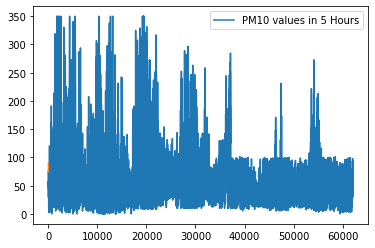

In [83]:
plt.plot(data, label='PM10 values in 5 Hours')
plt.plot(predictions5)
plt.legend()
plt.show()

# 2. Predicting the PM10  average for the next 10 hours?

---



In [84]:
# make predictions
predictions10, _, _ = model_fit.forecast(steps=10)
print(predictions10)

[89.65139346 85.16349268 81.19569006 77.70978719 74.64811303 71.95907308
 69.59731562 67.52300722 65.70116249 64.10105415]


In [85]:
np.average(predictions10)

74.72500889783427

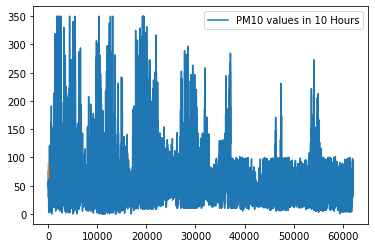

In [86]:
plt.plot(data, label='PM10 values in 10 Hours')
plt.plot(predictions10)
plt.legend()
plt.show()

# 3. Setting the thresholds 50 and 120, and finding the probability that the PM10 value will remain below or above this threshold in the next 25 hours?

---

In [87]:
# get predictions
predictions, std_err, conf_int = model_fit.forecast(steps=25)

# calculate CDF for PM10 values below threshold
threshold50 = 50
prob_below_threshold = norm.cdf(threshold50, predictions, std_err)
print(f'Probability of PM10 values remaining below {threshold50} in the next 25 hours: {prob_below_threshold}')


Probability of PM10 values remaining below 50 in the next 25 hours: [0.01088574 0.0668941  0.12648204 0.17713817 0.21907517 0.25395776
 0.28325723 0.30809798 0.32932326 0.34757237 0.36333918 0.37701291
 0.38890616 0.39927411 0.40832813 0.41624532 0.42317555 0.42924668
 0.43456844 0.43923551 0.44332989 0.44692285 0.45007646 0.45284489
 0.45527548]


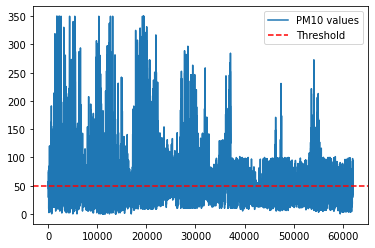

In [88]:
# Plotting the PM10 values over time and the probability 
plt.plot(data, label='PM10 values')
plt.axhline(y=threshold50, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

In [89]:
# get predictions
predictions, std_err, conf_int = model_fit.forecast(steps=25)

# calculate CDF for PM10 values below threshold
threshold120 = 120
prob_below_threshold = norm.cdf(threshold120, predictions, std_err)
print(f'Probability of PM10 values remaining below {threshold120} in the next 25 hours: {prob_below_threshold}')


Probability of PM10 values remaining below 120 in the next 25 hours: [0.96045989 0.93127935 0.92248696 0.92128145 0.92314798 0.92625852
 0.92978661 0.93333699 0.93671926 0.93984689 0.94268794 0.94523954
 0.94751399 0.94953103 0.95131346 0.9528847  0.95426739 0.95548272
 0.95655007 0.95748696 0.95830904 0.95903024 0.95966287 0.96021779
 0.96070455]


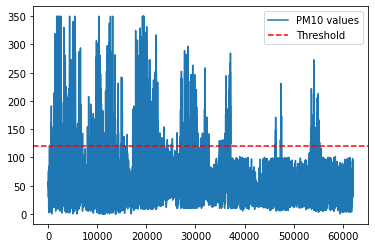

In [90]:
# Plotting the PM10 values over time and the probability 
plt.plot(data, label='PM10 values')
plt.axhline(y=threshold120, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

# 4. Predicting the PM10  value of the next hour using simple time series techniques?

---


In [28]:
def splitter(data, alpha = 0.8):  ### I have split the data into 0.8 and 0.2  to train and test 
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [29]:
data_train, data_test = splitter(data)

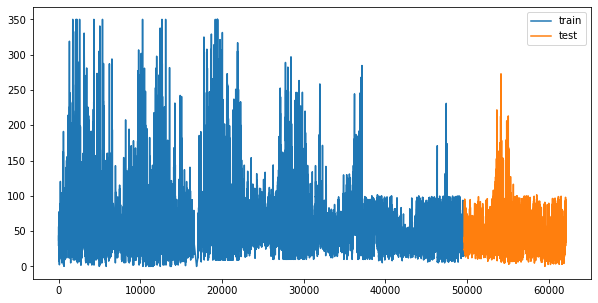

In [30]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [31]:
def sliding_window(data_:list, window_size:int = 30):
  data_ = np.array(data_)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data_[i+window_size])
      X.append(data_[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [32]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 49640 rows in your data
We have reached the end of the list! There are total number of 12388 rows in your data


# KNN

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 30) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [120]:
knn.score(X_test, y_test)   #### this give R2 score, no need to import slearn r2score.

0.6812019506410346

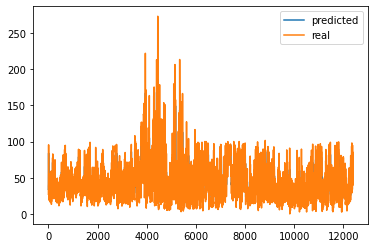

In [121]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "real")
plt.legend()
plt.show()

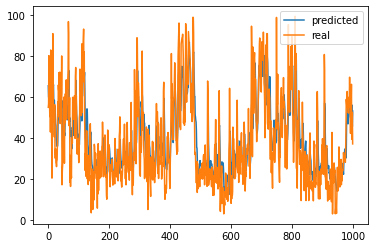

In [122]:
plt.plot(y_pred[11000:12000], label = "predicted")
plt.plot(y_test[11000:12000], label = "real")
plt.legend()
plt.show()

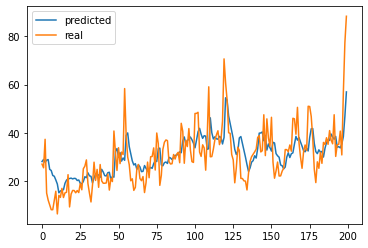

In [123]:
plt.plot(y_pred[9500:9700], label = "predicted")
plt.plot(y_test[9500:9700], label = "real")
plt.legend()
plt.show()

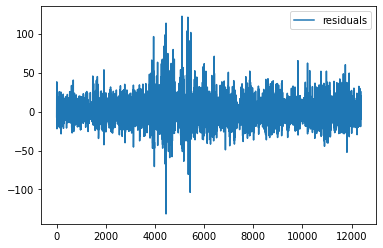

In [100]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [101]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.7776931205647898, 13.314732863138634)

# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.505597529591689


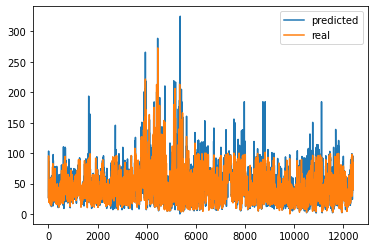

In [116]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "real")
plt.legend()
plt.show()

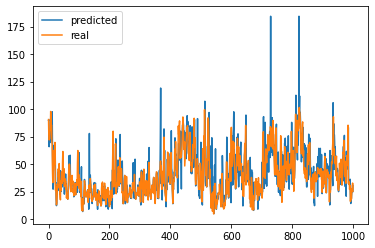

In [117]:
plt.plot(y_pred[8000:9000], label = "predicted")
plt.plot(y_test[8000:9000], label = "real")
plt.legend()
plt.show()

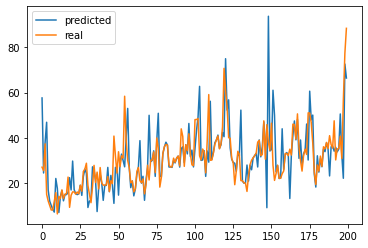

In [118]:
plt.plot(y_pred[9500:9700], label = "predicted")
plt.plot(y_test[9500:9700], label = "real")
plt.legend()
plt.show()

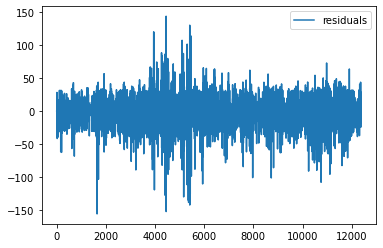

In [105]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [106]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-1.0103099295072806, 16.345364191536184)

# Neural networks

In [ ]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25), activation = "relu")
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test) 

0.7537271888728772


In [ ]:
plt.plot(y_pred[8000:9000], label = "predicted")
plt.plot(y_test[8000:9000], label = "real")
plt.legend()
plt.show()

In [ ]:
plt.plot(y_pred[9500:9700], label = "predicted")
plt.plot(y_test[9500:9700], label = "real")
plt.legend()
plt.show()

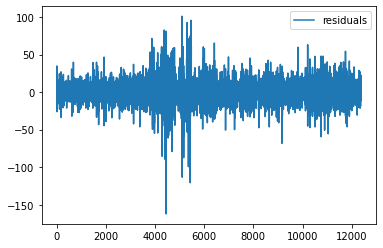

In [36]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [37]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(0.28221546131641373, 11.719162306239634)

# To conclude: Let's do a long term forecast and see what happens?


---



In [38]:
def function(regressor, data:np.array, length = 10):
  temp = np.copy(data)
  for i in range(length):
    L = regressor.predict(temp.reshape(1,-1))
    temp = np.roll(temp, -1)
    temp[-1] = L
  return temp

In [39]:
function(ml, X_train[-1], 250)  #### length 25 forecast we did.

array([51.19744614, 51.20263952, 51.20654452, 51.20877838, 51.20940703,
       51.2089012 , 51.20798699, 51.20743913, 51.2078749 , 51.20960205,
       51.21255758, 51.21634789, 51.22037271, 51.2239949 , 51.22670948,
       51.22826826, 51.22873048, 51.22842986, 51.22787085, 51.22758572,
       51.22799284, 51.22929376, 51.23143339, 51.23413009, 51.2369638 ,
       51.23949535, 51.24138332, 51.24246803, 51.24280294, 51.2426279 ])

In [41]:
index = data_test.index  ### we get the index set.  of the train set

In [45]:

X_forecast = function(ml, X_train[-1], 20)  #### length 25 forecast we did.

In [46]:
data_forecast = pd.Series(X_forecast)
data_forecast.index = range(index[0]+1, index[0]+len(data_forecast)+1)

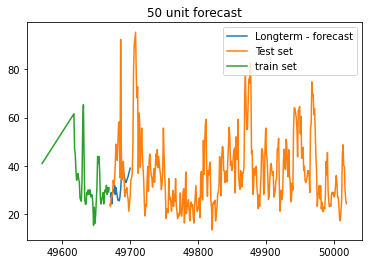

In [47]:
plt.plot(data_forecast, label= "Longterm - forecast")
plt.plot(data_test[:350], label = "Test set")
plt.plot(data_train[-100:], label = "train set")
plt.title("50 unit forecast")
plt.legend()
plt.show()